In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
import pandas as pd
import os

In [2]:
model = tf.keras.models.load_model('../models/siren_broaden_instrument')

In [3]:
# Load experimental slice 1 
c_q_slice1 = np.array(pd.read_csv(os.path.join('../data_experimental/Qlist_path2_woBG.csv'), header=None)).T
c_E_slice1 = np.array(pd.read_csv(os.path.join('../data_experimental/Elist_path2_woBG.csv'), header=None)[0]).T
c_sqw_slice1 = np.array(pd.read_csv(os.path.join('../data_experimental/Sqw_path2.csv'), header=None)).T

# Load experimental slice 2
c_q_slice2 = np.array(pd.read_csv(os.path.join('../data_experimental/Qlist_path3_woBG.csv'), header=None)).T
c_E_slice2 = np.array(pd.read_csv(os.path.join('../data_experimental/Elist_path3_woBG.csv'), header=None)[0]).T
c_sqw_slice2 = np.array(pd.read_csv(os.path.join('../data_experimental/Sqw_path3.csv'), header=None)).T


In [4]:
# Convert image data into (q, E) format for tensorflow optimization
test_x_1, test_y_1 = image_to_coords(c_q_slice1, c_E_slice1, c_sqw_slice1, background_start=150,background_end=160)
test_x_2, test_y_2 = image_to_coords(c_q_slice2, c_E_slice2, c_sqw_slice2, background_start=95,background_end=100)

# Fit slice 1 

100%|██████████| 2000/2000 [00:27<00:00, 73.23it/s]


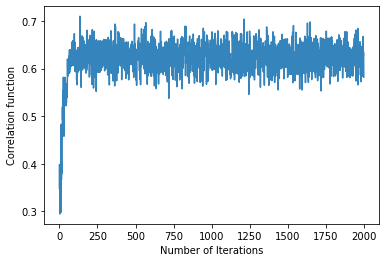

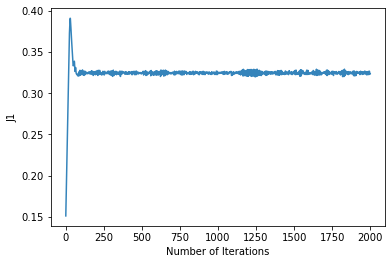

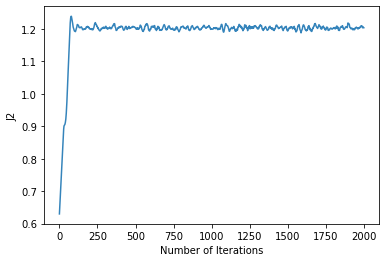

In [51]:
test_x = tf.convert_to_tensor(test_x_1, dtype=tf.float32)
test_y = tf.convert_to_tensor(test_y_1, dtype=tf.float32)

# Run surrogate model optimization

learning_rate = 0.01 
batch_size = 2048
max_iter=2000

min_loss, min_loss_j1, min_loss_j2, metrics  = optimize_surrogate(test_x, test_y, model, learning_rate = learning_rate, batch_size = batch_size, max_iter=max_iter, plotting = True)

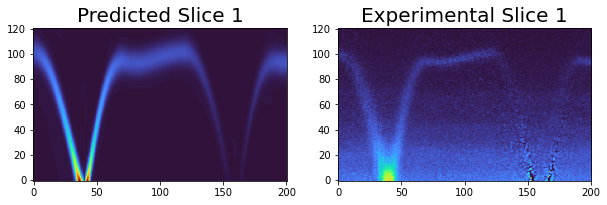

In [52]:
pred_slice1_image = np.exp(path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice1, c_E_slice1, model)) - 1 

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(np.exp(pred_slice1_image) - 1, origin = 'lower', cmap = 'turbo')
axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo')
axs[1].set_title('Experimental Slice 1' , fontsize = 20)
plt.show()

# Fit slice 2

100%|██████████| 2000/2000 [00:26<00:00, 74.64it/s]


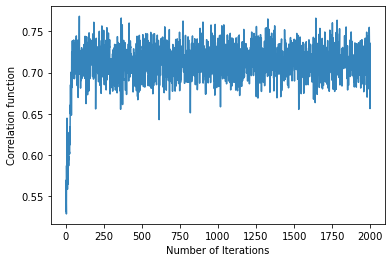

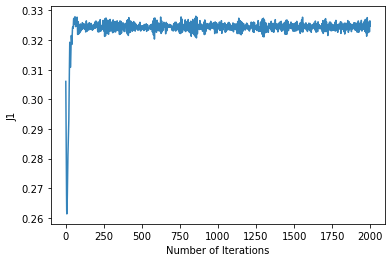

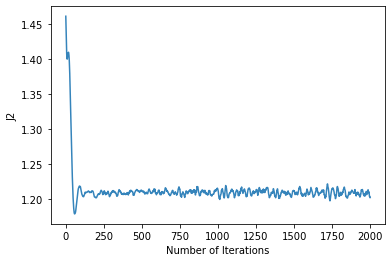

In [53]:
test_y = tf.convert_to_tensor(test_y_2[test_y_2 != 0], dtype=tf.float32)
test_x = tf.convert_to_tensor(test_x_2[test_y_2 != 0], dtype=tf.float32)

# Run surrogate model optimization

learning_rate = 0.01 
batch_size = 2048
max_iter=2000

min_loss, min_loss_j1, min_loss_j2, metrics  = optimize_surrogate(test_x, test_y, model, learning_rate = learning_rate, batch_size = batch_size, max_iter=max_iter, plotting = True)

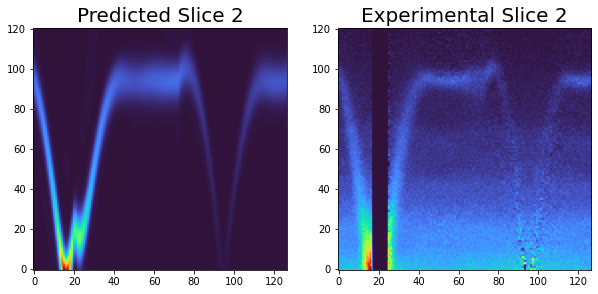

In [54]:
pred_slice2_image = np.exp(path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice2, c_E_slice2, model)) - 1 

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(np.exp(pred_slice2_image) - 1, origin = 'lower', cmap = 'turbo')
axs[0].set_title('Predicted Slice 2', fontsize = 20)
axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo')
axs[1].set_title('Experimental Slice 2' , fontsize = 20)
plt.show()

# Fit slice 1 and 2 together 

In [5]:
# Convert image data into (q, E) format for tensorflow optimization
test_x_1, test_y_1 = image_to_coords(c_q_slice1, c_E_slice1, c_sqw_slice1, background_start=150,background_end=160)
test_x_2, test_y_2 = image_to_coords(c_q_slice2, c_E_slice2, c_sqw_slice2, background_start=95,background_end=100)

test_x = tf.convert_to_tensor(np.vstack((test_x_1, test_x_2[test_y_2 != 0])), dtype=tf.float32)

# mask applied to y on second slice because data is missing 
test_y = tf.convert_to_tensor(np.concatenate((test_y_1, test_y_2[test_y_2 != 0])), dtype=tf.float32)

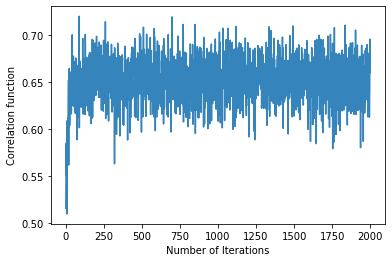

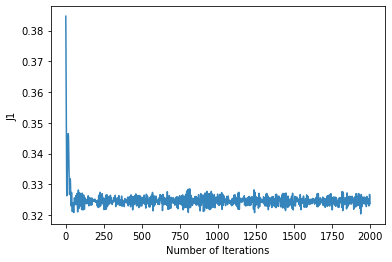

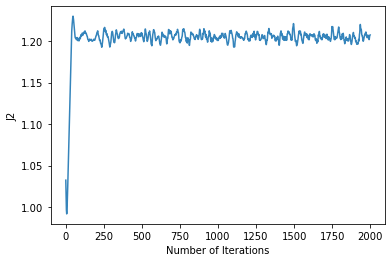

In [6]:
# Run surrogate model optimization

learning_rate = 0.01 
batch_size = 2048
max_iter=2000

min_loss, min_loss_j1, min_loss_j2, metrics  = optimize_surrogate(test_x, test_y, model, learning_rate = learning_rate, batch_size = batch_size, max_iter=max_iter, plotting = True)

In [7]:
pred_slice1_image = np.exp(path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice1, c_E_slice1, model)) - 1 
pred_slice2_image = np.exp(path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice2, c_E_slice2, model)) - 1

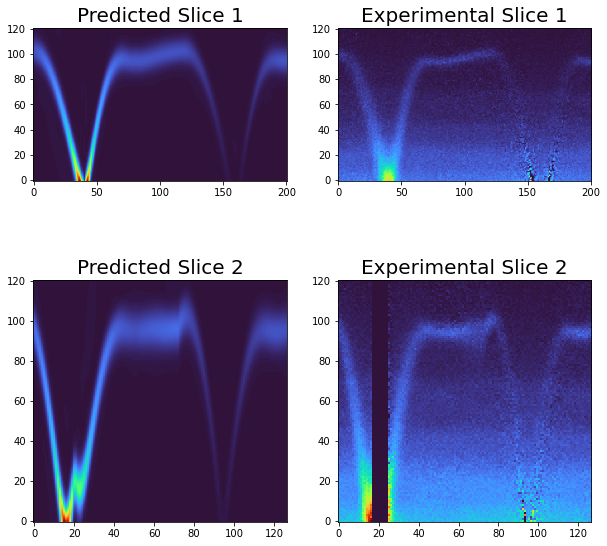

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(np.exp(pred_slice1_image) - 1, origin = 'lower', cmap = 'turbo')
axs[0, 0].set_title('Predicted Slice 1', fontsize = 20)
axs[0, 1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo')
axs[0, 1].set_title('Experimental Slice 1' , fontsize = 20)
axs[1, 0].imshow(np.exp(pred_slice2_image) - 1, origin = 'lower', cmap = 'turbo')
axs[1, 0].set_title('Predicted Slice 2', fontsize = 20)
axs[1, 1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo')
axs[1, 1].set_title('Experimental Slice 2', fontsize = 20)
plt.show()

# loss landscape

In [ ]:
loss_vals = calculate_loss_landscape(test_x, test_y, model, gridsize = 75)

 24%|██▎       | 1327/5625 [27:54<1:30:47,  1.27s/it]

In [ ]:
np.save('loss_landscape_full', np.array(loss_vals))

In [ ]:
import matplotlib.tri as tri

plt.figure(figsize=(8, 6), dpi=80)
plt.tricontour(loss_vals[:,0], loss_vals[:,1], loss_vals[:,2], 21, linewidths=2.0, cmap='gist_heat')
plt.xlabel('J1', fontsize=16)
plt.ylabel('J2', fontsize=16)
plt.scatter([0.328], [1.2198], marker = '*', s=300, color = 'maroon', label = 'Analytical Fitting')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from matplotlib import cm
import matplotlib 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(loss_vals[:,0], loss_vals[:,1], loss_vals[:,2], cmap=cm.coolwarm, linewidth=0)
ax.set_xlabel('j1', fontsize = 20)
ax.set_ylabel('j2', fontsize = 20)
fig.colorbar(surf)
fig.tight_layout()
# Hide grid lines
ax.grid(False)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.set_zticks([])
ax.view_init(9, 125)
plt.show() # or: